# Kuramoto model 

$$
\dot{\theta_{i}} = \omega_{i} + \frac{K}{n}\sum^{n}_{j=1} sin(\theta_{j} - \theta_{i})
$$

$i \in 1,...,n$

where, $\theta_{i}$ is phase, $\omega_{i}$ is natural frequency and K is coupling gain of the oscillator

No handles with labels found to put in legend.


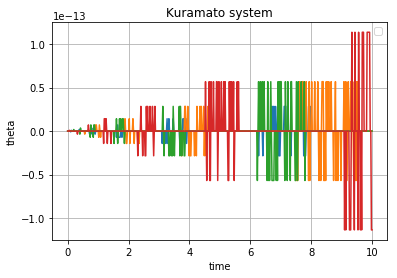

In [3]:
#%% Kuramoto Oscillator Model
import numpy as np
from scipy.integrate import odeint

def kuramoto_oscillator(ths, t, omegas, k, n):
    dthdt = []
    
    for th, omega in zip(ths, omegas):
        dthdt.append(omega + k/n * sinsum(ths, th))
    
    return dthdt

def sinsum(ths, th):
        summ = 0
        th_i = th
        for th_j in ths:
            summ += np.sin(th_j - th_i)
        return summ   

def phase(theta):
    # n rounds
    n = theta/ (2 * np.pi)
    return theta - n * 2 * np.pi

# Parameters

n = 4
k = 10

omegas = np.random.randint(1,100, n)

ths0 =  np.pi*np.random.random_sample(n)


# Solve the differential equation

## ODE solver parameters
stoptime = 10.0
numpoints = 500

# Create the time samples for the output of the ODE solver.
t = np.linspace(0, stoptime, numpoints)

# Call the ODE solver 
wsol = odeint(kuramoto_oscillator, ths0, t, args=(omegas, k, n))



#%% Plot
import matplotlib.pyplot as plt 
fig_reaction = plt.figure()

for i in range(wsol.shape[1]):
    plt.plot(t,phase(wsol[:,i]))

plt.legend()
plt.grid()
plt.title('Kuramato system')
plt.xlabel('time')
plt.ylabel('theta')
plt.show()